# Gurmukhi Handwritten Digit Classification 

## Multiclass Classification with Tensorflow

## Problem statement:
- Gurmukhi is one of the popular Indian scripts widely used in Indian state of Punjab. In this part of the assignment,our goal is to develop a neural network solution (a simple NN, not a CNN) for classifying Gurmukhi digits.

In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns
from matplotlib import pyplot as plt
import cv2
import os
from tensorflow.keras.preprocessing.image import load_img
from glob import glob
import random
from tensorflow.keras.layers import BatchNormalization

In [2]:
path = './GurNum/train'
testratio = 0.2
validatepath = './GurNum/val'

In [3]:
myList = os.listdir(path)
images = []
classNo = []
valdateImages = []
validateclasses = []
val_noOfcls = os.listdir(validatepath)
noOfClasses = len(myList)
noOf_val_cls = len(val_noOfcls)
print(noOfClasses)
print(noOf_val_cls)

10
10


## Validate data reading

In [4]:
for x in range (0, noOf_val_cls):
    myPicList = os.listdir(validatepath + "/"+str(x))
    for y in myPicList:
        curImg = cv2.imread(validatepath + "/"+str(x)+ "/"+y)
        curImg = cv2.resize(curImg,(32,32))
        valdateImages.append(curImg)
        validateclasses.append(x)
        
    print(x, end = " ")

0 1 2 3 4 5 6 7 8 9 

## Train and test data reading

In [5]:
for x in range (0, noOfClasses):
    myPicList = os.listdir(path + "/"+str(x))
    for y in myPicList:
        curImg = cv2.imread(path + "/"+str(x)+ "/"+y)
        curImg = cv2.resize(curImg,(32,32))
        images.append(curImg)
        classNo.append(x)
        
    print(x, end = " ")
                            
                        

0 1 2 3 4 5 6 7 8 9 

How Many images we have imported

In [6]:
def plot_one_sample_of_each(base_path):
    CLASSES = [folder[len(base_path) + 1:] for folder in glob(base_path + '/*')]
    CLASSES.sort()
    cols = 5
    rows = int(np.ceil(len(CLASSES) / cols))
    fig = plt.figure(figsize=(50, 15))
    
    for i in range(len(CLASSES)):
        cls = CLASSES[i]
        img_path = base_path + '/' + cls + '/**'
        path_contents = glob(img_path)
    
        imgs = random.sample(path_contents, 1)

        sp = plt.subplot(rows, cols, i + 1)
        plt.imshow(cv2.imread(imgs[0]))
        plt.title(cls)
        #sp.axis('off')

    plt.show()
    return

## visualize one instance of each classes present in the dataset

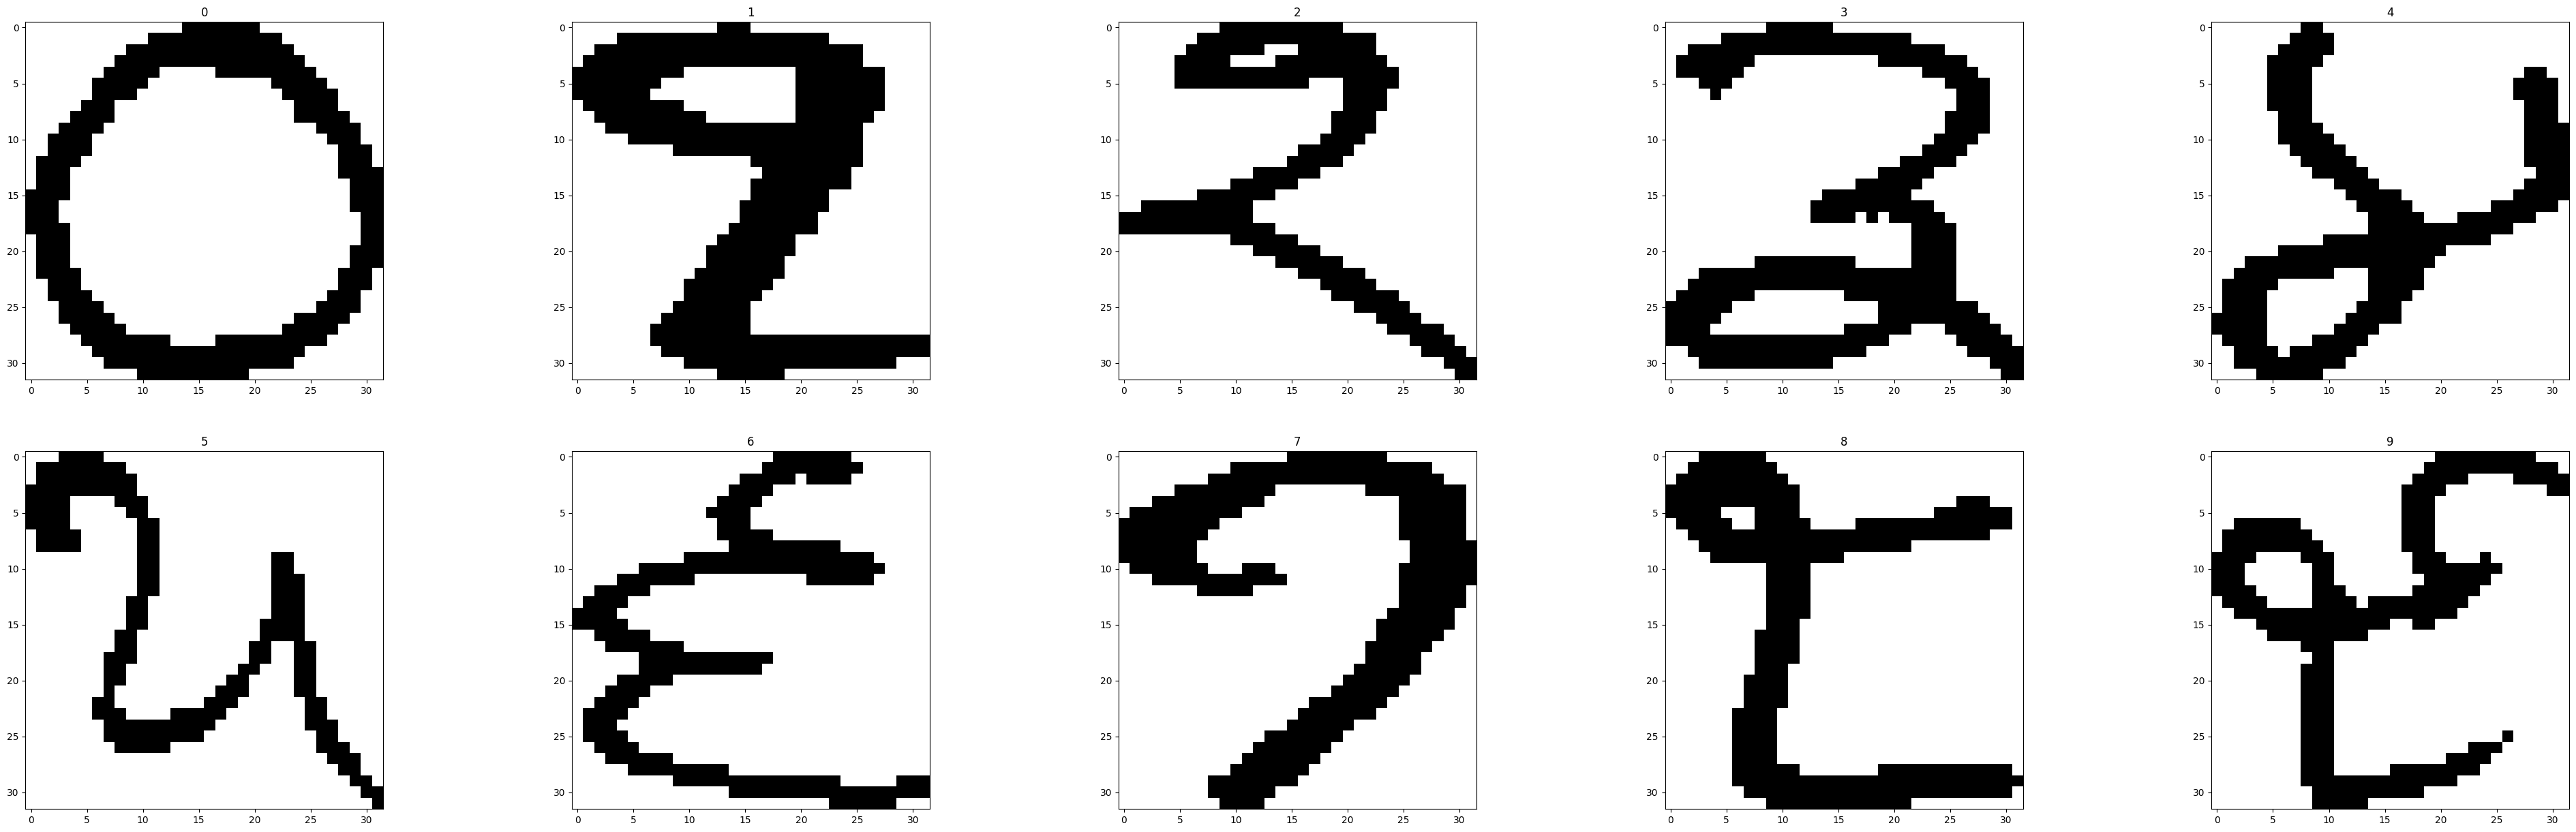

In [7]:

plot_one_sample_of_each(path)

In [8]:
print("length of train data ",len(images))
print("length of validate data ",len(valdateImages))

length of train data  1000
length of validate data  178


In [9]:
print("length of train classes ",len(classNo))
print("length of validate class ",len(validateclasses))

length of train classes  1000
length of validate class  178


In [10]:
images = np.array(images)
classNo = np.array(classNo)
print("train data images Shape")
print(images.shape)
print("train data class No shape ")
print(classNo.shape)

valdateImages = np.array(valdateImages)
validateclasses = np.array(validateclasses)
print("validate data images Shape")
print(valdateImages.shape)
print("validate data class No shape ")
print(validateclasses.shape)

train data images Shape
(1000, 32, 32, 3)
train data class No shape 
(1000,)
validate data images Shape
(178, 32, 32, 3)
validate data class No shape 
(178,)


### Spliting Data

In [11]:
X_train,X_test,y_train,y_test = train_test_split(images,classNo,test_size=0.25)
print("X train data shape is ......",X_train.shape)
print("X test data shape is .......",X_test.shape)
print("Y train data shape is ......",y_train.shape)
print("Y test data shape is .......",y_test.shape)


X train data shape is ...... (750, 32, 32, 3)
X test data shape is ....... (250, 32, 32, 3)
Y train data shape is ...... (750,)
Y test data shape is ....... (250,)


## spliting validate data 

In [12]:
X_validate = valdateImages
y_validate = validateclasses

In [13]:
print("X validate data shape is .......",X_validate.shape)
print("Y validate data shape is ......",y_validate.shape)

X validate data shape is ....... (178, 32, 32, 3)
Y validate data shape is ...... (178,)


## check how many images we have of each class

In [14]:
numOfSamples = []
for x in range (0, noOfClasses):
    numOfSamples.append(len(np.where(y_train == x)[0]))
    #print(len(np.where(y_train == x)[0]))
print(numOfSamples)

[78, 72, 79, 75, 69, 79, 73, 78, 77, 70]


In [15]:
import matplotlib.pyplot as plt

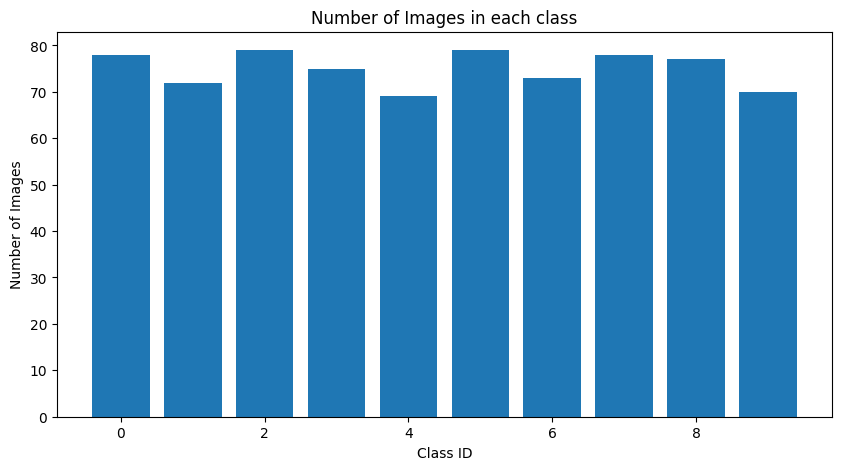

In [16]:
plt.figure(figsize=(10,5))
plt.bar(range(0,noOfClasses), numOfSamples)
plt.xlabel('Class ID')
plt.ylabel('Number of Images')
  
# naming the title of the plot
plt.title('Number of Images in each class')
plt.show()

## Preprocess all the images

In [17]:
def preProcessing(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.equalizeHist(img)
    img = img/255
    return img

In [18]:
#imge = preProcessing(X_train[1])
#imge = cv2.resize(imge,(300,300))
#cv2.imshow("PreProcessed ", img)
#cv2.imshow('preProcessing', imge)
  
#cv2.waitKey(0)

In [19]:
X_train = np.array(list(map(preProcessing,X_train)))
#imge2 = X_train[7]
#imge2 = cv2.resize(imge2,(300,300))
#cv2.imshow("PreProcessed ", img)
#cv2.imshow('preProcessing', imge2)
  
#cv2.waitKey(0)


In [20]:
X_test = np.array(list(map(preProcessing,X_test)))
X_validate = np.array(list(map(preProcessing,X_validate)))
print(X_test[5].shape)

(32, 32)


## adding depth

In [21]:
print(X_train.shape)
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],X_train.shape[2],1)
print(X_train.shape)

(750, 32, 32)
(750, 32, 32, 1)


In [22]:
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],X_test.shape[2],1)
X_validate = X_validate.reshape(X_validate.shape[0],X_validate.shape[1],X_validate.shape[2],1)

## Agumentation

In [23]:
import tensorflow as tf

In [24]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [25]:
dataGen = ImageDataGenerator(rotation_range=20,
                             width_shift_range=0.2,
                             height_shift_range=0.2,
                             shear_range = 0.1,
                             zoom_range = 0.2)
dataGen.fit(X_train)


In [26]:
from tensorflow.keras.utils import to_categorical

In [27]:
y_train = to_categorical(y_train, noOfClasses)
y_test = to_categorical(y_test, noOfClasses)
y_validate = to_categorical(y_validate, noOfClasses)

In [28]:
from tensorflow.python.keras.layers.convolutional import Conv2D
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.python.keras.layers.convolutional import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [29]:
def myModel():
    noOfFilters = 60
    sizeOfFilter1 = (5,5)
    sizeOfFilter2 = (3,3)
    sizeOfPool = (2,2)
    noOfNode = 500
    imageDimensions = (32,32,3)
    model = Sequential()
    model.add((Conv2D(noOfFilters,sizeOfFilter1,input_shape = (imageDimensions[0],imageDimensions[1],1),activation='relu')))
    model.add((Conv2D(noOfFilters,sizeOfFilter1,activation='relu')))
    model.add(MaxPooling2D(pool_size = sizeOfPool))
    model.add((Conv2D(noOfFilters//2,sizeOfFilter2,activation='relu')))
    model.add((Conv2D(noOfFilters//2,sizeOfFilter2,activation='relu')))
    model.add(MaxPooling2D(pool_size = sizeOfPool))
    model.add(Dropout(0.5))
    model.add(Flatten())
    model.add(Dense(noOfNode,activation = 'relu'))
    model.add(Dropout(0.5))
    model.add(Dense(noOfClasses,activation = 'softmax'))
    model.compile(Adam(learning_rate = 0.001),loss = 'categorical_crossentropy',metrics = ['accuracy'])
    return model
    

# Model 1

In [30]:
model1 = myModel()
#print(modelwe.summary())
batchSizeVal = 40
epochsVal = 20
stepsPerEpoch = 10
history1 = model1.fit(dataGen.flow(X_train,y_train,batch_size = batchSizeVal),
                   steps_per_epoch = stepsPerEpoch, epochs = epochsVal, validation_data = (X_test,y_test),
                   shuffle = 1)

Epoch 1/20
10/10 [==============================] - 2s 127ms/step - loss: 2.3086 - accuracy: 0.0925 - val_loss: 2.2907 - val_accuracy: 0.0960
Epoch 2/20
10/10 [==============================] - 1s 113ms/step - loss: 2.2943 - accuracy: 0.1275 - val_loss: 2.2274 - val_accuracy: 0.3000
Epoch 3/20
10/10 [==============================] - 1s 114ms/step - loss: 2.1952 - accuracy: 0.1925 - val_loss: 1.7958 - val_accuracy: 0.4520
Epoch 4/20
10/10 [==============================] - 1s 112ms/step - loss: 2.0154 - accuracy: 0.2564 - val_loss: 1.3442 - val_accuracy: 0.5240
Epoch 5/20
10/10 [==============================] - 1s 116ms/step - loss: 1.8622 - accuracy: 0.3275 - val_loss: 1.2360 - val_accuracy: 0.6200
Epoch 6/20
10/10 [==============================] - 1s 115ms/step - loss: 1.7667 - accuracy: 0.3800 - val_loss: 0.8520 - val_accuracy: 0.7760
Epoch 7/20
10/10 [==============================] - 1s 114ms/step - loss: 1.6064 - accuracy: 0.4590 - val_loss: 0.7317 - val_accuracy: 0.8640
Epoch 

In [31]:
print('history of model 1')
print(history1)
print('evaluate model 1')
model1.evaluate(X_test, y_test)
model1.evaluate(X_validate, y_validate)

history of model 1
evaluate model 1
6/6 [==============================] - 0s 26ms/step - loss: 0.3314 - accuracy: 0.8933


[0.3314320743083954, 0.8932584524154663]

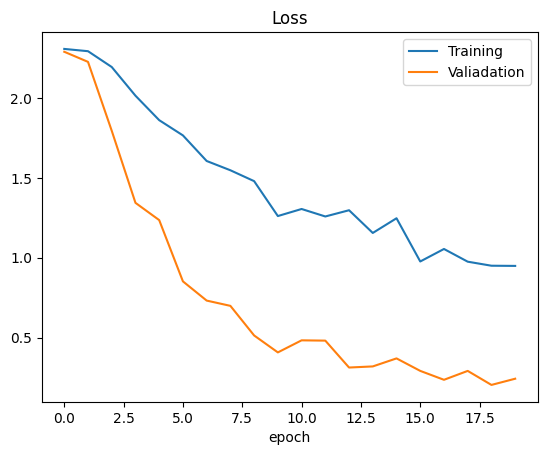

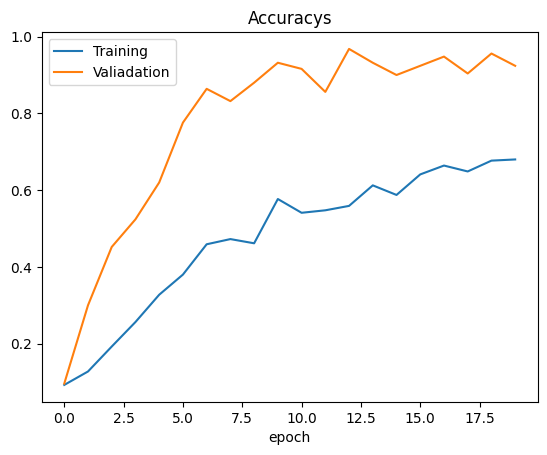

test score 0.24214312434196472
Test Accuracy  0.9240000247955322


In [32]:
plt.figure(1)
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.legend(['Training','Valiadation'])
plt.title('Loss')
plt.xlabel('epoch')

plt.figure(2)
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.legend(['Training','Valiadation'])
plt.title('Accuracys')
plt.xlabel('epoch')
plt.show()
score = model1.evaluate(X_test,y_test,verbose = 0)
print('test score' , score[0])
print('Test Accuracy ',score[1])


6/6 [==============================] - 0s 25ms/step


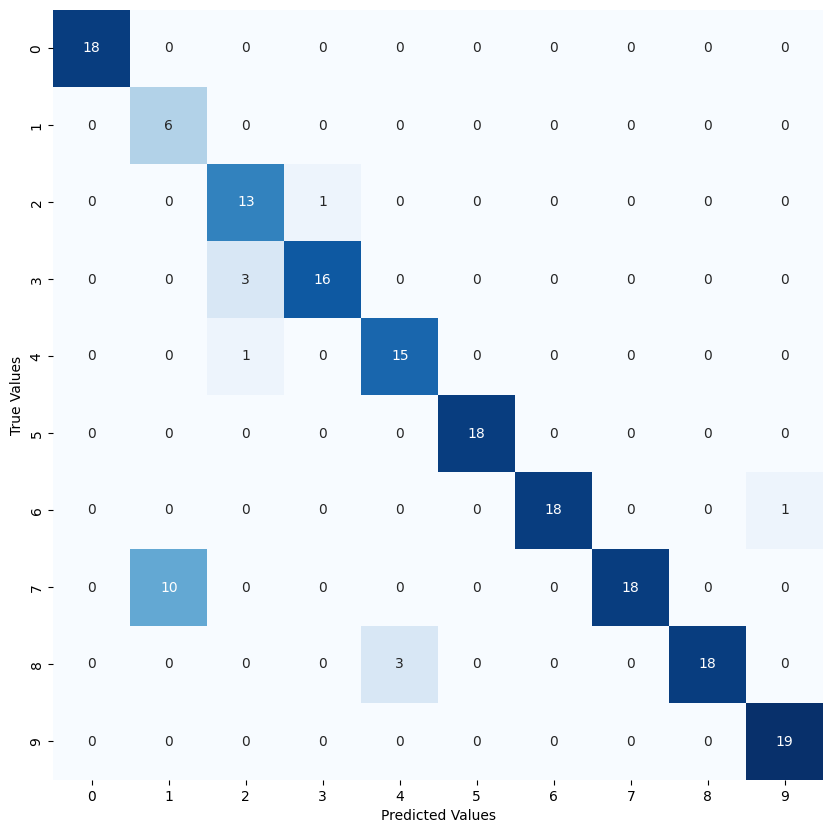

In [33]:
fig = plt.figure(figsize=(10, 10)) # Set Figure

y_pred = model1.predict(X_validate) # Predict class probabilities as 2 => [0.1, 0, 0.9, 0, 0, 0, 0, 0, 0, 0]

Y_pred = np.argmax(y_pred, 1) # Decode Predicted labels
Y_test = np.argmax(y_validate, 1) # Decode labels

mat = confusion_matrix(Y_test, Y_pred) # Confusion matrix

# Plot Confusion matrix
sns.heatmap(mat.T, square=True, annot=True, cbar=False, cmap=plt.cm.Blues, fmt='.0f')
plt.xlabel('Predicted Values')
plt.ylabel('True Values');
plt.show();

# Model 2

In [34]:
model2 = myModel()
#print(modelwe.summary())
batchSizeVal = 10
epochsVal = 30
stepsPerEpoch = 20
history2 = model2.fit(dataGen.flow(X_train,y_train,batch_size = batchSizeVal),
                   steps_per_epoch = stepsPerEpoch, epochs = epochsVal, validation_data = (X_test,y_test),
                   shuffle = 1)

Epoch 1/30
20/20 [==============================] - 2s 60ms/step - loss: 2.3299 - accuracy: 0.0850 - val_loss: 2.3025 - val_accuracy: 0.1520
Epoch 2/30
20/20 [==============================] - 1s 55ms/step - loss: 2.3027 - accuracy: 0.0850 - val_loss: 2.2928 - val_accuracy: 0.1480
Epoch 3/30
20/20 [==============================] - 1s 55ms/step - loss: 2.3009 - accuracy: 0.1150 - val_loss: 2.2661 - val_accuracy: 0.2680
Epoch 4/30
20/20 [==============================] - 1s 55ms/step - loss: 2.2479 - accuracy: 0.1500 - val_loss: 2.2047 - val_accuracy: 0.1480
Epoch 5/30
20/20 [==============================] - 1s 55ms/step - loss: 2.2319 - accuracy: 0.1850 - val_loss: 1.9138 - val_accuracy: 0.2960
Epoch 6/30
20/20 [==============================] - 1s 54ms/step - loss: 2.1130 - accuracy: 0.2600 - val_loss: 1.3697 - val_accuracy: 0.5680
Epoch 7/30
20/20 [==============================] - 1s 55ms/step - loss: 2.1051 - accuracy: 0.2400 - val_loss: 1.4931 - val_accuracy: 0.4840
Epoch 8/30
20

In [35]:
print('history of model 2')
print(history2)
print('evaluate model 2')
model2.evaluate(X_test, y_test)
model2.evaluate(X_validate, y_validate)

history of model 2
evaluate model 2
6/6 [==============================] - 0s 25ms/step - loss: 0.3991 - accuracy: 0.8820


[0.39910632371902466, 0.882022500038147]

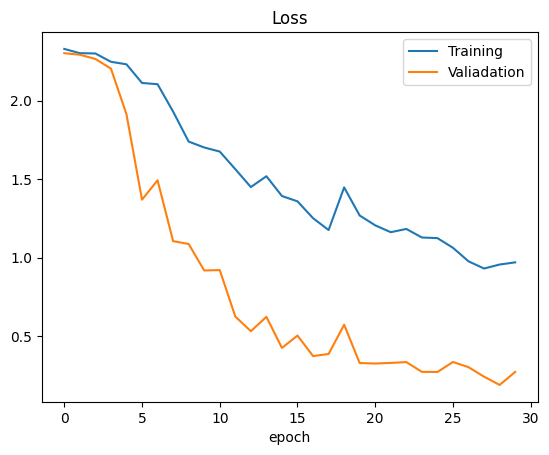

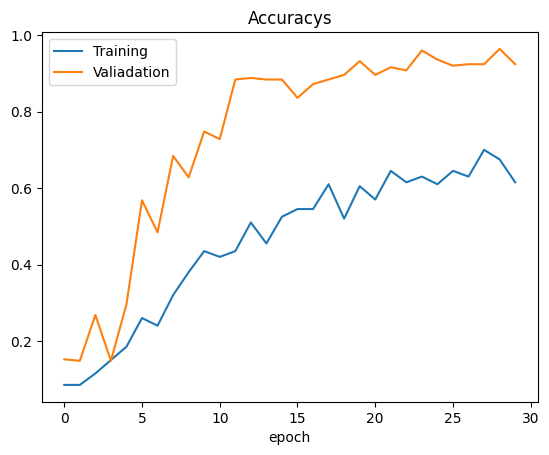

test score 0.27227550745010376
Test Accuracy  0.9240000247955322


In [36]:
plt.figure(1)
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.legend(['Training','Valiadation'])
plt.title('Loss')
plt.xlabel('epoch')

plt.figure(2)
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.legend(['Training','Valiadation'])
plt.title('Accuracys')
plt.xlabel('epoch')
plt.show()
score = model2.evaluate(X_test,y_test,verbose = 0)
print('test score' , score[0])
print('Test Accuracy ',score[1])

6/6 [==============================] - 0s 25ms/step


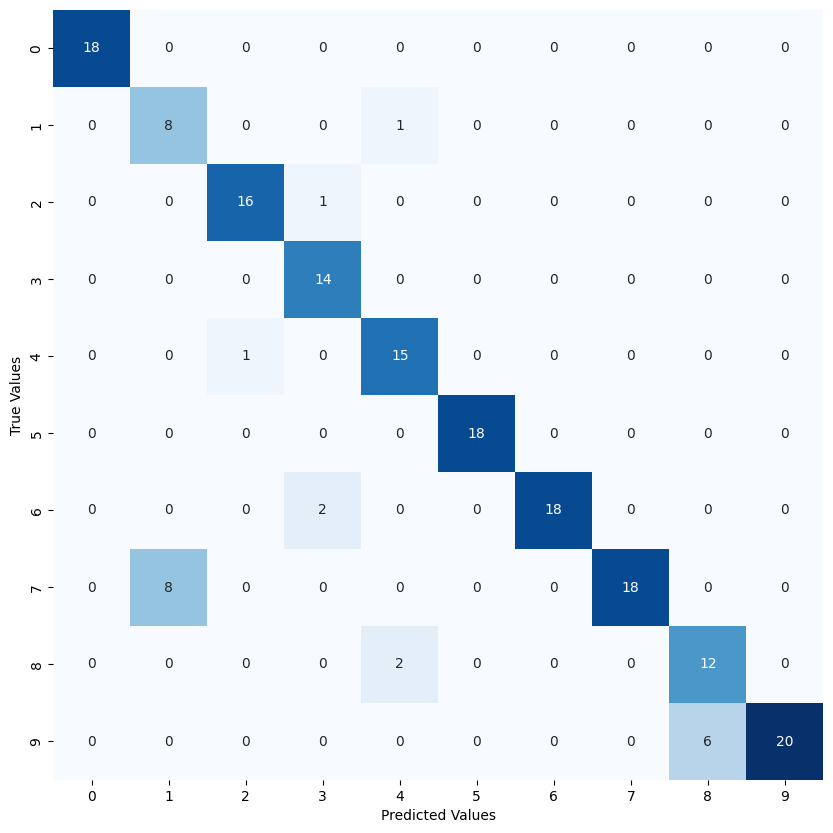

In [37]:
fig = plt.figure(figsize=(10, 10)) # Set Figure

y_pred = model2.predict(X_validate) # Predict class probabilities as 2 => [0.1, 0, 0.9, 0, 0, 0, 0, 0, 0, 0]

Y_pred = np.argmax(y_pred, 1) # Decode Predicted labels
Y_test = np.argmax(y_validate, 1) # Decode labels

mat = confusion_matrix(Y_test, Y_pred) # Confusion matrix

# Plot Confusion matrix
sns.heatmap(mat.T, square=True, annot=True, cbar=False, cmap=plt.cm.Blues, fmt='.0f')
plt.xlabel('Predicted Values')
plt.ylabel('True Values');
plt.show();

# Model 3

In [38]:
model3 = myModel()
#print(modelwe.summary())
batchSizeVal = 40
epochsVal = 60
stepsPerEpoch = 10
history3 = model3.fit(dataGen.flow(X_train,y_train,batch_size = batchSizeVal),
                   steps_per_epoch = stepsPerEpoch, epochs = epochsVal, validation_data = (X_test,y_test),
                   shuffle = 1)

Epoch 1/60
10/10 [==============================] - 2s 171ms/step - loss: 2.3195 - accuracy: 0.1026 - val_loss: 2.3009 - val_accuracy: 0.0960
Epoch 2/60
10/10 [==============================] - 2s 153ms/step - loss: 2.3075 - accuracy: 0.1000 - val_loss: 2.3002 - val_accuracy: 0.1600
Epoch 3/60
10/10 [==============================] - 2s 155ms/step - loss: 2.3027 - accuracy: 0.1077 - val_loss: 2.2966 - val_accuracy: 0.1720
Epoch 4/60
10/10 [==============================] - 2s 157ms/step - loss: 2.2937 - accuracy: 0.1450 - val_loss: 2.2696 - val_accuracy: 0.1800
Epoch 5/60
10/10 [==============================] - 2s 155ms/step - loss: 2.2263 - accuracy: 0.1974 - val_loss: 1.9679 - val_accuracy: 0.2880
Epoch 6/60
10/10 [==============================] - 2s 153ms/step - loss: 2.0203 - accuracy: 0.2385 - val_loss: 1.3790 - val_accuracy: 0.5920
Epoch 7/60
10/10 [==============================] - 2s 154ms/step - loss: 1.9083 - accuracy: 0.3400 - val_loss: 1.2918 - val_accuracy: 0.6280
Epoch 

10/10 [==============================] - 2s 160ms/step - loss: 0.4821 - accuracy: 0.8436 - val_loss: 0.0710 - val_accuracy: 0.9800
Epoch 59/60
10/10 [==============================] - 2s 165ms/step - loss: 0.5537 - accuracy: 0.8200 - val_loss: 0.0778 - val_accuracy: 0.9720
Epoch 60/60
10/10 [==============================] - 2s 164ms/step - loss: 0.5719 - accuracy: 0.8325 - val_loss: 0.0615 - val_accuracy: 0.9840


In [39]:
print('history of model 3')
print(history3)
print('evaluate model 3')
model3.evaluate(X_test, y_test)
model3.evaluate(X_validate, y_validate)

history of model 3
evaluate model 3
6/6 [==============================] - 0s 25ms/step - loss: 0.0832 - accuracy: 0.9831


[0.08319909125566483, 0.983146071434021]

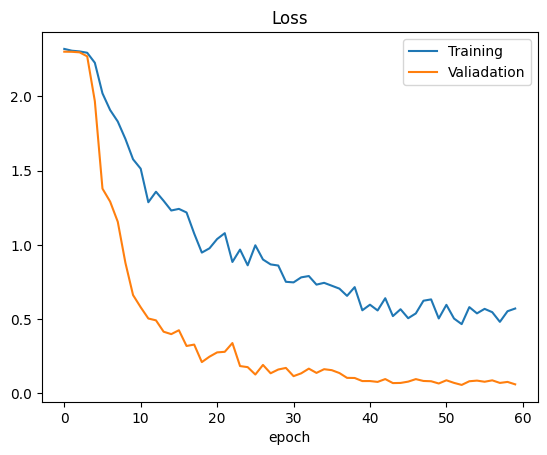

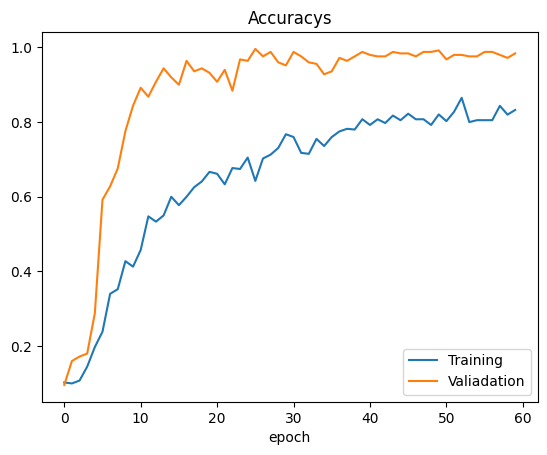

test score 0.06150415167212486
Test Accuracy  0.984000027179718


In [40]:
plt.figure(1)
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.legend(['Training','Valiadation'])
plt.title('Loss')
plt.xlabel('epoch')

plt.figure(2)
plt.plot(history3.history['accuracy'])
plt.plot(history3.history['val_accuracy'])
plt.legend(['Training','Valiadation'])
plt.title('Accuracys')
plt.xlabel('epoch')
plt.show()
score = model3.evaluate(X_test,y_test,verbose = 0)
print('test score' , score[0])
print('Test Accuracy ',score[1])

6/6 [==============================] - 0s 25ms/step


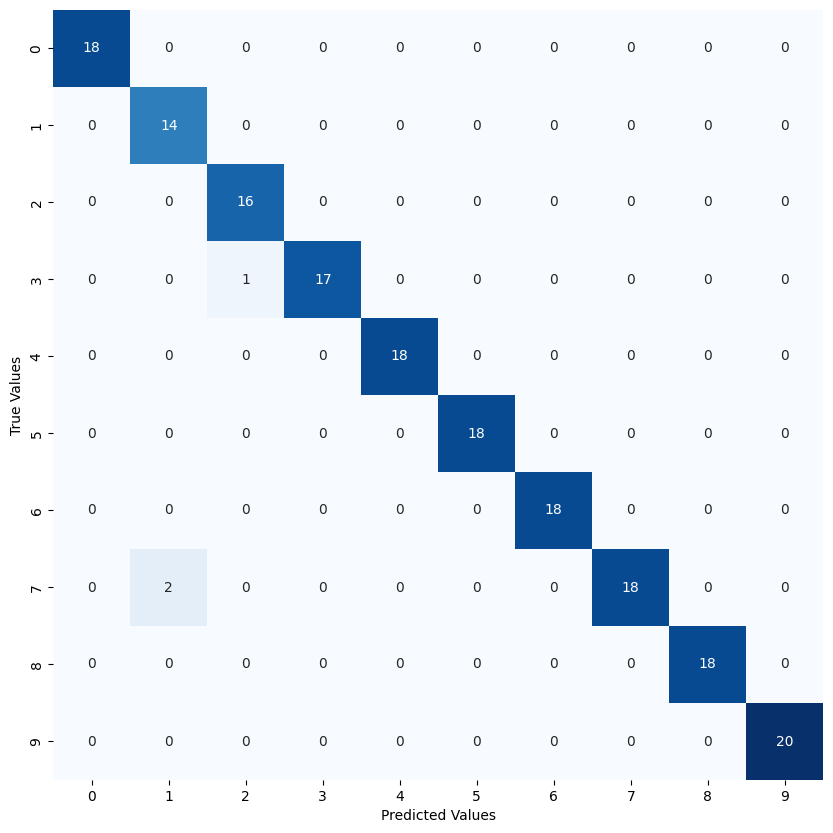

In [41]:
fig = plt.figure(figsize=(10, 10)) # Set Figure

y_pred = model3.predict(X_validate) # Predict class probabilities as 2 => [0.1, 0, 0.9, 0, 0, 0, 0, 0, 0, 0]

Y_pred = np.argmax(y_pred, 1) # Decode Predicted labels
Y_test = np.argmax(y_validate, 1) # Decode labels

mat = confusion_matrix(Y_test, Y_pred) # Confusion matrix

# Plot Confusion matrix
sns.heatmap(mat.T, square=True, annot=True, cbar=False, cmap=plt.cm.Blues, fmt='.0f')
plt.xlabel('Predicted Values')
plt.ylabel('True Values');
plt.show();

# Model 4

In [42]:
es = tf.keras.callbacks.EarlyStopping(
        monitor="val_accuracy", # metrics to monitor
        patience=10, # how many epochs before stop
        verbose=1,
        mode="max", # we need the maximum accuracy.
        restore_best_weights=True, # 
     )

rp = tf.keras.callbacks.ReduceLROnPlateau(
        monitor="val_accuracy",
        factor=0.2,
        patience=3,
        verbose=1,
        mode="max",
        min_lr=0.00001,
     )

In [43]:
model4 = myModel()
#print(modelwe.summary())
batchSizeVal = 32
epochsVal = 100
stepsPerEpoch = 20
history4 = model4.fit(dataGen.flow(X_train,y_train,batch_size = batchSizeVal),
                   steps_per_epoch = stepsPerEpoch, epochs = epochsVal, validation_data = (X_test,y_test))

Epoch 1/100
20/20 [==============================] - 4s 134ms/step - loss: 2.3147 - accuracy: 0.1141 - val_loss: 2.2919 - val_accuracy: 0.1400
Epoch 2/100
20/20 [==============================] - 2s 122ms/step - loss: 2.2806 - accuracy: 0.1302 - val_loss: 2.0958 - val_accuracy: 0.3880
Epoch 3/100
20/20 [==============================] - 3s 128ms/step - loss: 2.1294 - accuracy: 0.2297 - val_loss: 1.7233 - val_accuracy: 0.5240
Epoch 4/100
20/20 [==============================] - 2s 124ms/step - loss: 1.9281 - accuracy: 0.3344 - val_loss: 1.0299 - val_accuracy: 0.6920
Epoch 5/100
20/20 [==============================] - 3s 125ms/step - loss: 1.6208 - accuracy: 0.4518 - val_loss: 0.8236 - val_accuracy: 0.8280
Epoch 6/100
20/20 [==============================] - 2s 123ms/step - loss: 1.4840 - accuracy: 0.4646 - val_loss: 0.5704 - val_accuracy: 0.8680
Epoch 7/100
20/20 [==============================] - 2s 124ms/step - loss: 1.4314 - accuracy: 0.5016 - val_loss: 0.4946 - val_accuracy: 0.8760

Epoch 58/100
20/20 [==============================] - 2s 124ms/step - loss: 0.4295 - accuracy: 0.8553 - val_loss: 0.0477 - val_accuracy: 0.9920
Epoch 59/100
20/20 [==============================] - 2s 122ms/step - loss: 0.3385 - accuracy: 0.8955 - val_loss: 0.0245 - val_accuracy: 0.9920
Epoch 60/100
20/20 [==============================] - 3s 126ms/step - loss: 0.3903 - accuracy: 0.8781 - val_loss: 0.0279 - val_accuracy: 0.9960
Epoch 61/100
20/20 [==============================] - 3s 125ms/step - loss: 0.2847 - accuracy: 0.9132 - val_loss: 0.0363 - val_accuracy: 0.9920
Epoch 62/100
20/20 [==============================] - 3s 125ms/step - loss: 0.2962 - accuracy: 0.8984 - val_loss: 0.0256 - val_accuracy: 0.9960
Epoch 63/100
20/20 [==============================] - 3s 126ms/step - loss: 0.3421 - accuracy: 0.8922 - val_loss: 0.0249 - val_accuracy: 0.9920
Epoch 64/100
20/20 [==============================] - 2s 123ms/step - loss: 0.3895 - accuracy: 0.8585 - val_loss: 0.0247 - val_accuracy:

In [44]:

print('history of model 4')
print(history4)
print('evaluate model 4')
model4.evaluate(X_test, y_test)
model4.evaluate(X_validate, y_validate)

history of model 4
evaluate model 4
6/6 [==============================] - 0s 27ms/step - loss: 0.0385 - accuracy: 0.9888


[0.03851940482854843, 0.9887640476226807]

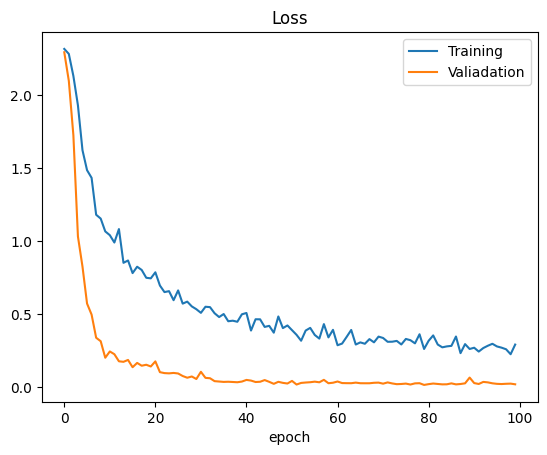

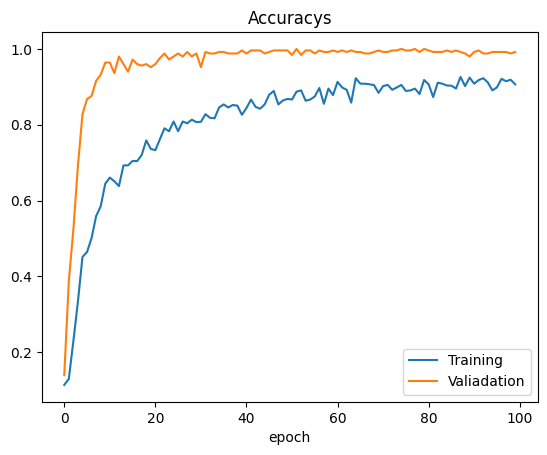

test score 0.017173701897263527
Test Accuracy  0.9919999837875366


In [45]:
plt.figure(1)
plt.plot(history4.history['loss'])
plt.plot(history4.history['val_loss'])
plt.legend(['Training','Valiadation'])
plt.title('Loss')
plt.xlabel('epoch')

plt.figure(2)
plt.plot(history4.history['accuracy'])
plt.plot(history4.history['val_accuracy'])
plt.legend(['Training','Valiadation'])
plt.title('Accuracys')
plt.xlabel('epoch')
plt.show()
score = model4.evaluate(X_test,y_test,verbose = 0)
print('test score' , score[0])
print('Test Accuracy ',score[1])

In [46]:
model4.evaluate(X_validate, y_validate)

6/6 [==============================] - 0s 25ms/step - loss: 0.0385 - accuracy: 0.9888


[0.03851940482854843, 0.9887640476226807]

In [47]:
y_predicted = model4.predict(X_validate)
y_predicted[56]
np.argmax(y_predicted[56])

6/6 [==============================] - 0s 23ms/step


3

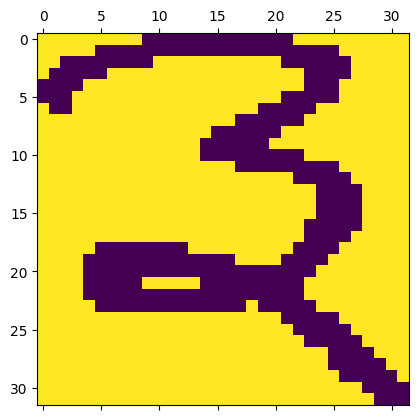

In [48]:
plt.matshow(X_validate[56])

8/8 [==============================] - 0s 23ms/step


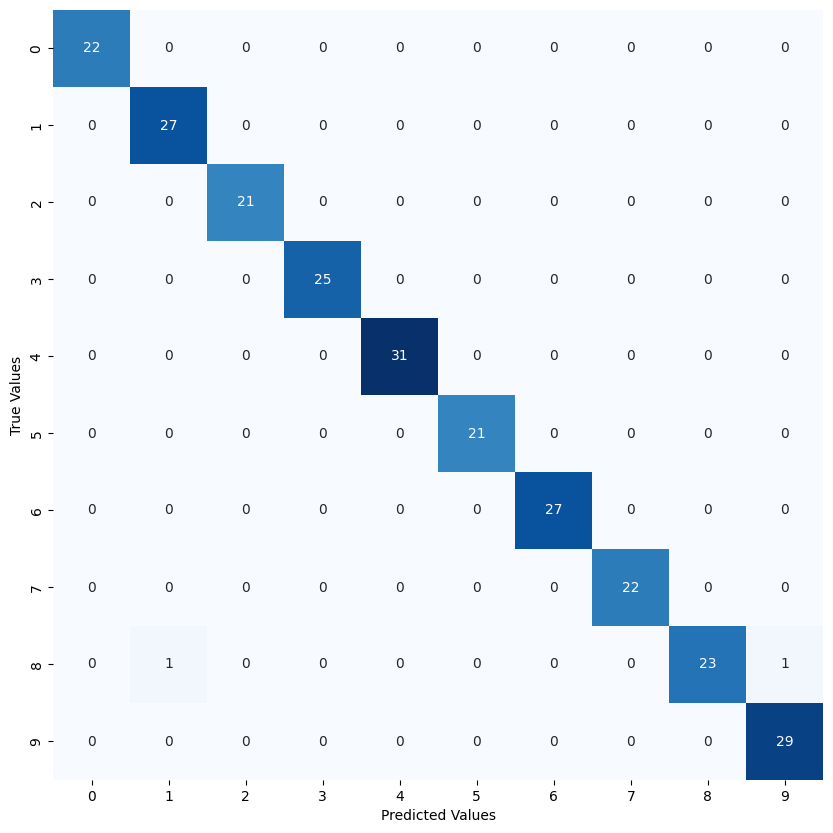

In [49]:
fig = plt.figure(figsize=(10, 10)) # Set Figure

y_pred = model4.predict(X_test) # Predict class probabilities as 2 => [0.1, 0, 0.9, 0, 0, 0, 0, 0, 0, 0]

Y_pred = np.argmax(y_pred, 1) # Decode Predicted labels
Y_test = np.argmax(y_test, 1) # Decode labels

mat = confusion_matrix(Y_test, Y_pred) # Confusion matrix

# Plot Confusion matrix
sns.heatmap(mat.T, square=True, annot=True, cbar=False, cmap=plt.cm.Blues, fmt='.0f')
plt.xlabel('Predicted Values')
plt.ylabel('True Values');
plt.show();

6/6 [==============================] - 0s 23ms/step


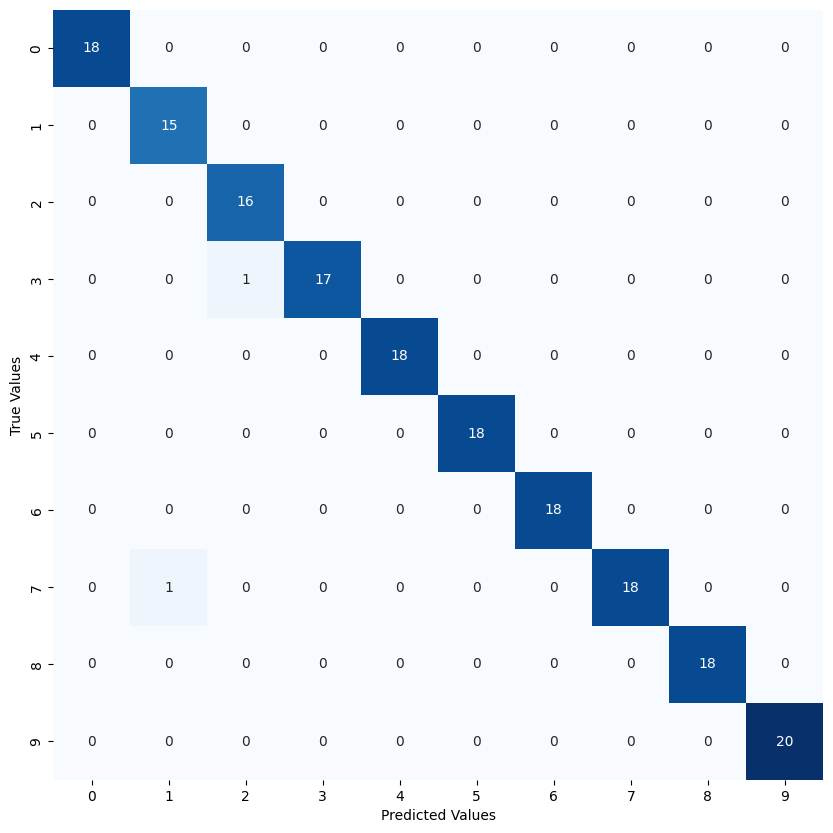

In [50]:
fig = plt.figure(figsize=(10, 10)) # Set Figure

y_pred = model4.predict(X_validate) # Predict class probabilities as 2 => [0.1, 0, 0.9, 0, 0, 0, 0, 0, 0, 0]

Y_pred = np.argmax(y_pred, 1) # Decode Predicted labels
Y_test = np.argmax(y_validate, 1) # Decode labels

mat = confusion_matrix(Y_test, Y_pred) # Confusion matrix

# Plot Confusion matrix
sns.heatmap(mat.T, square=True, annot=True, cbar=False, cmap=plt.cm.Blues, fmt='.0f')
plt.xlabel('Predicted Values')
plt.ylabel('True Values');
plt.show();

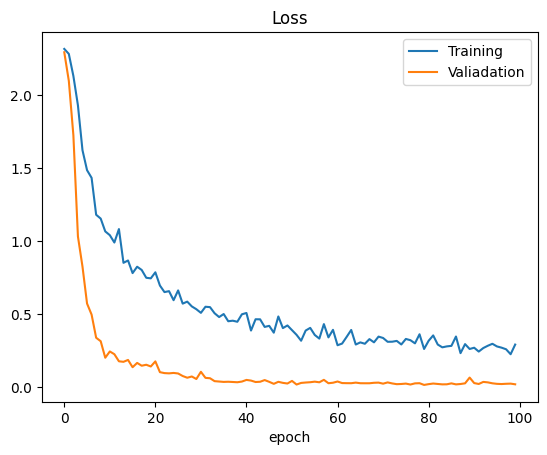

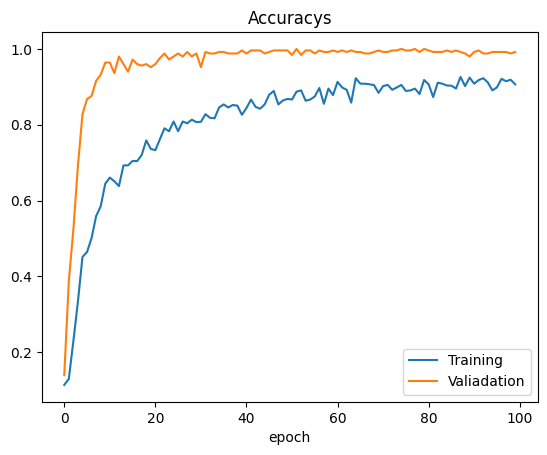

test score 0.017173701897263527
Test Accuracy  0.9919999837875366


In [51]:
plt.figure(1)
plt.plot(history4.history['loss'])
plt.plot(history4.history['val_loss'])
plt.legend(['Training','Valiadation'])
plt.title('Loss')
plt.xlabel('epoch')

plt.figure(2)
plt.plot(history4.history['accuracy'])
plt.plot(history4.history['val_accuracy'])
plt.legend(['Training','Valiadation'])
plt.title('Accuracys')
plt.xlabel('epoch')
plt.show()
score = model4.evaluate(X_test,y_test,verbose = 0)
print('test score' , score[0])
print('Test Accuracy ',score[1])


In [52]:
layers = model4.layers

print('Number of layers:', len(layers))
for layer in layers:
    print(layer.name, layer.output_shape)

Number of layers: 11
module_wrapper_18 (None, None, None, 60)
module_wrapper_19 (None, None, None, 60)
module_wrapper_20 (None, None, None, 60)
module_wrapper_21 (None, None, None, 30)
module_wrapper_22 (None, None, None, 30)
module_wrapper_23 (None, None, None, 30)
dropout_6 (None, None, None, 30)
flatten_3 (None, None)
dense_6 (None, 500)
dropout_7 (None, 500)
dense_7 (None, 10)


In [53]:
layers = model4.layers

print('Number of layers:', len(layers))
for layer in layers:
    print(layer.name, layer.output_shape)
    layer = model4.layers[0]
    weights, bias = layer.get_weights()
    print('Weights shape:', weights.shape)
    print('Bias shape:', bias.shape)


Number of layers: 11
module_wrapper_18 (None, None, None, 60)
Weights shape: (5, 5, 1, 60)
Bias shape: (60,)
module_wrapper_19 (None, None, None, 60)
Weights shape: (5, 5, 1, 60)
Bias shape: (60,)
module_wrapper_20 (None, None, None, 60)
Weights shape: (5, 5, 1, 60)
Bias shape: (60,)
module_wrapper_21 (None, None, None, 30)
Weights shape: (5, 5, 1, 60)
Bias shape: (60,)
module_wrapper_22 (None, None, None, 30)
Weights shape: (5, 5, 1, 60)
Bias shape: (60,)
module_wrapper_23 (None, None, None, 30)
Weights shape: (5, 5, 1, 60)
Bias shape: (60,)
dropout_6 (None, None, None, 30)
Weights shape: (5, 5, 1, 60)
Bias shape: (60,)
flatten_3 (None, None)
Weights shape: (5, 5, 1, 60)
Bias shape: (60,)
dense_6 (None, 500)
Weights shape: (5, 5, 1, 60)
Bias shape: (60,)
dropout_7 (None, 500)
Weights shape: (5, 5, 1, 60)
Bias shape: (60,)
dense_7 (None, 10)
Weights shape: (5, 5, 1, 60)
Bias shape: (60,)


In [54]:
from tensorflow.keras.utils import plot_model
import matplotlib.pyplot as plt

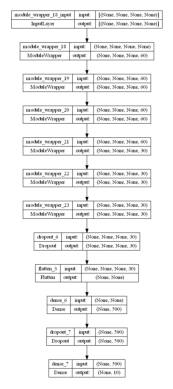

In [55]:
# Plot the model architecture using Matplotlib
plot_model(model4, show_shapes=True, show_layer_names=True, to_file='model.png')

# Show the plot
img = plt.imread('model.png')
plt.imshow(img)
plt.axis('off')
plt.show()